# Regresión con datos sintéticos

Aplica regresión lineal a los datos sintéticos que se encuentran divididos en los archivos de entrenamiento **x_entrenamiento.csv** y **y_entrenamiento.csv** y los de prueba **x_prueba.csv**  y **y_rueba.csv**
Estos datos fueron contaminados con ruido gaussiano con media igual a 0 y desviación estándar
igual a 0.05. 

Realiza lo siguiente:

In [41]:
# Comando para visualizar los archivos que tengo en la carpeta de Tarea3
!ls

03_regresion_clasificacion_lineal.pdf  housing.data.5
Codigos_Regresion_Lineal	       Predicción de juegos.ipynb
housing.data			       Predicción de precios de casas.ipynb
housing.data.1			       regl_data
housing.data.2			       regl_data.zip
housing.data.3			       Regresión_Dato_Sintéticos.ipynb
housing.data.4


In [42]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display


In [43]:
x_train = pd.read_csv("regl_data/x_train.csv",header=None)
y_train = pd.read_csv("regl_data/y_train.csv",header=None)

print "Dimensiones del x_train:"
display(x_train.shape)

print "Dimensiones del y_train:"
display(y_train.shape)

print "x_train"
display(x_train.head())

print "y_train"
display (y_train.head())

Dimensiones del x_train:


(200, 2)

Dimensiones del y_train:


(200, 1)

x_train


,0,1
0,-1.913570,2.032600
1,1.817693,2.787149
2,-1.287542,1.051852
3,1.091132,2.287752
4,-0.952672,2.885976


y_train


,0
0,0.619935
1,-0.640359
2,1.874947
3,-0.365971
4,0.623855


## Estadisticos del *data_set* de entrenamiento: 


In [44]:
display ("Estadisticos del data_set de entrenamiento")
display (x_train.describe())

display ("Estadisticos del data_set de entrenamiento")
display (y_train.describe())

'Estadisticos del data_set de entrenamiento'

,0,1
count,200.000000,200.000000
mean,-0.040296,1.918557
std,1.287247,0.721394
min,-1.928379,0.550237
25%,-1.296099,1.333912
50%,0.496013,1.932160
75%,1.154615,2.538318
max,1.912665,3.129935


'Estadisticos del data_set de entrenamiento'

,0
count,200.000000
mean,0.528573
std,1.047393
min,-1.913288
25%,-0.225868
50%,0.631330
75%,1.222403
max,2.661427


Grafica los datos de entrenamiento y de prueba y comenta brevemente acerca de cómo están
distribuidos.

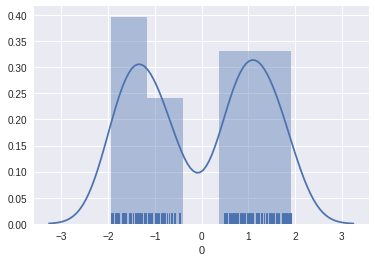

In [45]:

sns.distplot(x_train[0], hist=True, rug=True);

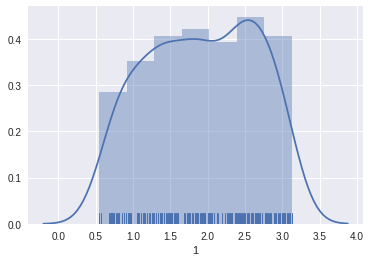

In [46]:
sns.distplot(x_train[1], hist=True, rug=True);

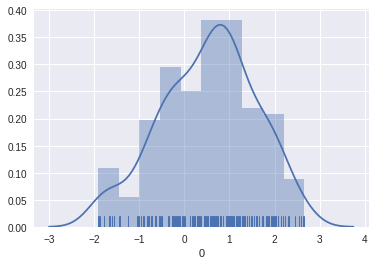

In [47]:
sns.distplot(y_train[0], hist=True, rug=True);

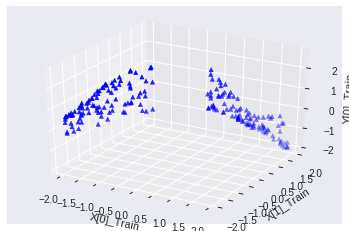

In [48]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 200
xs = x_train[0]
ys = x_train[0]
zs = y_train[0]
ax.scatter(xs, ys, zs, c='b', marker='^')

ax.set_xlabel('X[0]_Train')
ax.set_ylabel('X[1]_Train')
ax.set_zlabel('Y[0]_Train')

plt.show()

# Visualizacion y carga de los datos de prueba:

In [49]:
x_test = pd.read_csv("regl_data/x_test.csv",header=None)
y_test = pd.read_csv("regl_data/y_test.csv",header=None)

print "Dimensiones del x_test:"
display(x_test.shape)

print "Dimensiones del y_test:"
display(y_test.shape)


print "x_test "
display(x_test.head())
print "y_test:"
display(y_test.head())

Dimensiones del x_test:


(200, 2)

Dimensiones del y_test:


(200, 1)

x_test 


,0,1
0,0.522360,2.641996
1,-1.556105,1.001378
2,1.578210,0.965343
3,-1.796698,1.007622
4,-1.778407,2.337267


y_test:


,0
0,0.489523
1,1.051965
2,-1.055267
3,0.492597
4,0.660550


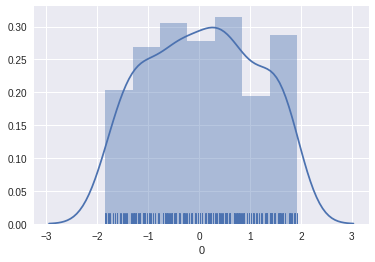

In [50]:
sns.distplot(x_test[0], hist=True, rug=True)

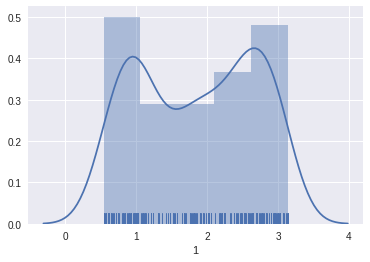

In [51]:
sns.distplot(x_test[1], hist=True, rug=True)

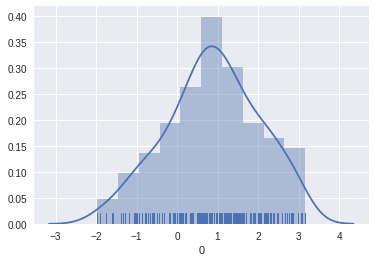

In [52]:
sns.distplot(y_test[0], hist=True, rug=True)

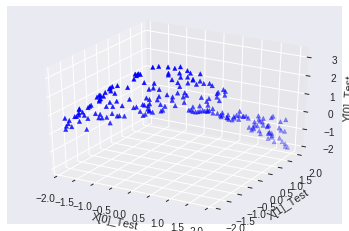

In [53]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n = 200
xs = x_test[0]
ys = x_test[0]
zs = y_test[0]
ax.scatter(xs, ys, zs, c='b', marker='^')

ax.set_xlabel('X[0]_Test')
ax.set_ylabel('X[1]_Test')
ax.set_zlabel('Y[0]_Test')

plt.show()

# b. Modelo utilizando implentación propia:

Se implementara el modelo de una regresión lineal de la forma $f(x)=\Theta_{0} + \Theta_{1}*x_{1}+ \Theta_{2}*x_{2}$

In [54]:
def polynomial_expansion(X, degree):
    phi_X = X
    for i in range(degree - 1):
        powerX = np.power(X, i + 2)
        phi_X = np.column_stack((phi_X, powerX))
    return phi_X

In [55]:
def MyLinearRegression(X_train,y_train):
    # Para encontrar pesos por mínimos cuadrados, theta_ml = (XT X)-1 XT y
    # (XT X)
    XTX = np.dot(X_train.T, X_train)
    # (XT X)-1
    XTX_inv = np.linalg.inv(XTX)
    # XT y
    XTy = np.dot(X_train.T, y_train)
    #theta_ml = (XT X)-1 XT y
    theta_ml = np.dot(XTX_inv, XTy)
    return theta_ml

In [79]:
# Definir procedimiento.
x_train_2 = x_train.as_matrix()
x_train_2 = np.insert(x_train_2, 0,1 ,axis=1)

x_test_2 = x_test.as_matrix()
x_test_2 = np.insert(x_test_2, 0,1 ,axis=1)

# Se obienen los párametros de Theta.
theta_ml = MyLinearRegression(x_train_2,y_train)
theta_ml =theta_ml.reshape(3,)

# Se obitne el valor para y^ 
y_train_hat= (np.sum(x_train_2*theta_ml,axis=1))
y_test_hat = (np.sum(x_test_2*theta_ml,axis=1))


print ("Los párametros encontrados usando el estimador de máxima verosimilitud son: ")
print  (theta_ml[0],theta_ml[1],theta_ml[2])

Los párametros encontrados usando el estimador de máxima verosimilitud son: 
(1.0833295824645832, -0.5461849484233422, -0.30062493084821673)


# Error cuadrático medio para los datos de entrenamiento y de prueba.

In [101]:
y_train_hat = y_train_hat.reshape(200,1)
y_test_hat = y_test_hat.reshape(200,1) 

# Se inspecciona la suma de los cuadrados del error (SSE)
# entre las salidas del modelo y las deseadas
sse_train = (np.square(y_train - y_train_hat).sum())
sse_test = (np.square(y_test- y_test_hat).sum())

# Se calcula error promedio MSE = SSE / N de entrenamiento y validación
mse_train = sse_train / x_train_2.size
mse_test= sse_test / x_test_2.size

print ("===El error promedio para los datos de entrenamiento es el siguiente===")
print mse_train[0]

print ("\n")

print ("===El error promedio para los datos de validación es el siguiente===")
print mse_test[0]

===El error promedio para los datos de entrenamiento es el siguiente===
0.196549903299


===El error promedio para los datos de validación es el siguiente===
0.299576909709


# Modelo utilizando scikit-learn:

In [111]:
import numpy as np
from sklearn import datasets, linear_model

# Creamos un objeto de la clase LinearRegression
regr = linear_model.LinearRegression(fit_intercept=False)
# Entreando el modelo usando el data_set de entrenamiento.
regr.fit(x_train_2, y_train)

print ("Los párametros encontrados usando el estimador de máxima verosimilitud son: ")
print  (regr.coef_[0][0],regr.coef_[0][1],regr.coef_[0][2])


Los párametros encontrados usando el estimador de máxima verosimilitud son: 
(1.083329582464579, -0.54618494842334275, -0.30062493084821446)


# Error cuadrático medio para los datos de entrenamiento y de prueba.         (scikit-learn)

In [110]:
y_train_hat_sk = regr.predict(x_train_2)
y_test_hat_sk = regr.predict(x_test_2)


sse_train_sk = (np.square(y_train - y_train_hat_sk).sum())/x_train_2.size
sse_test_sk = (np.square(y_test- y_test_hat_sk).sum())/x_test_2.size

print ("===El error promedio para los datos de entrenamiento es el siguiente===")
print sse_train_sk[0]

print ("\n")

print ("===El error promedio para los datos de validación es el siguiente===")
print sse_test_sk[0]

===El error promedio para los datos de entrenamiento es el siguiente===
0.196549903299


===El error promedio para los datos de validación es el siguiente===
0.299576909709


# c.- Utilizando expansión de base polinomial y norma $l_{2}$.

In [113]:
def reggresion_L2(X_train,y_train,grade=1):
    phi_X_train = polynomial_expansion(X_train,grade)
    
    #Tecnicamente debemos de obtener una matriz de ceros ya que el grado al que vamos a expandir es 1
    #print (phi_X_train-X_train)
    
    # crea matriz de diseño (agrega 1 a las entradas para la ordenada al origen)
    #phi_X_train = X_train.copy()
    phi_X_train = np.insert(phi_X_train,0,1.0,axis=1)
    #print "Here",phi_X_train.shape
    lambda_const = 0.01
    regularizer = lambda_const * np.identity(phi_X_train.shape[1])
    theta_map = np.dot(np.linalg.inv(regularizer + np.dot(np.transpose(phi_X_train), phi_X_train)),
                   np.dot(np.transpose(phi_X_train), y_train))
    
    return phi_X_train,theta_map

In [133]:
x_train_3 = x_train.as_matrix()
x_train_3,theta_map = reggresion_L2(x_train_3,y_train,grade=1)

x_test_3 = x_test.as_matrix()
x_test_3 = np.insert(x_test_3, 0,1 ,axis=1)


y_train_hat_l2 = (np.sum(x_train_3*theta_map.T,axis=1))
y_test_hat_l2  = (np.sum(x_test_3*theta_map.T,axis=1))



In [125]:
# Se inspecciona la suma de los cuadrados del error (SSE)
# entre las salidas del modelo y las deseadas
sse_train_l2 = (np.square(y_train - y_train_hat_l2).sum())
sse_test_l2 = (np.square(y_test- y_test_hat_l2).sum())


# Se calcula error promedio MSE = SSE / N de entrenamiento y validación
mse_train_l2 = sse_train_l2 / x_train_2.size
mse_test_l2 = sse_test_l2 / x_test_2.size


print ("===El error promedio para los datos de entrenamiento usando norma l2 es el siguiente===")
print mse_train_l2[0]

print ("\n")

print ("===El error promedio para los datos de validación usando norma l2 es el siguiente===")
print mse_test_l2[0]

===El error promedio para los datos de entrenamiento usando norma l2 es el siguiente===
0.196549913906


===El error promedio para los datos de validación usando norma l2 es el siguiente===
0.299611619818


 # Aplicando norma $l_{2}$ utilizando la libreria de scikit-learn:

In [48]:
from sklearn.linear_model import Ridge
import numpy as np 

X_train = x_train.as_matrix()
phi_X_train = np.insert(X_train,0,1.0,axis=1)
clf=Ridge(alpha=0.01,fit_intercept=False)
clf.fit(phi_X_train,y_train) 

clf.coef_

array([[ 1.08282322, -0.54615367, -0.30038856]])